In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

from subprocess import check_output
data = pd.read_csv('../Pokemon Combat Prediction/pokemon.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [2]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Delete first column which contain row number

In [3]:
del data['#']
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
data.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


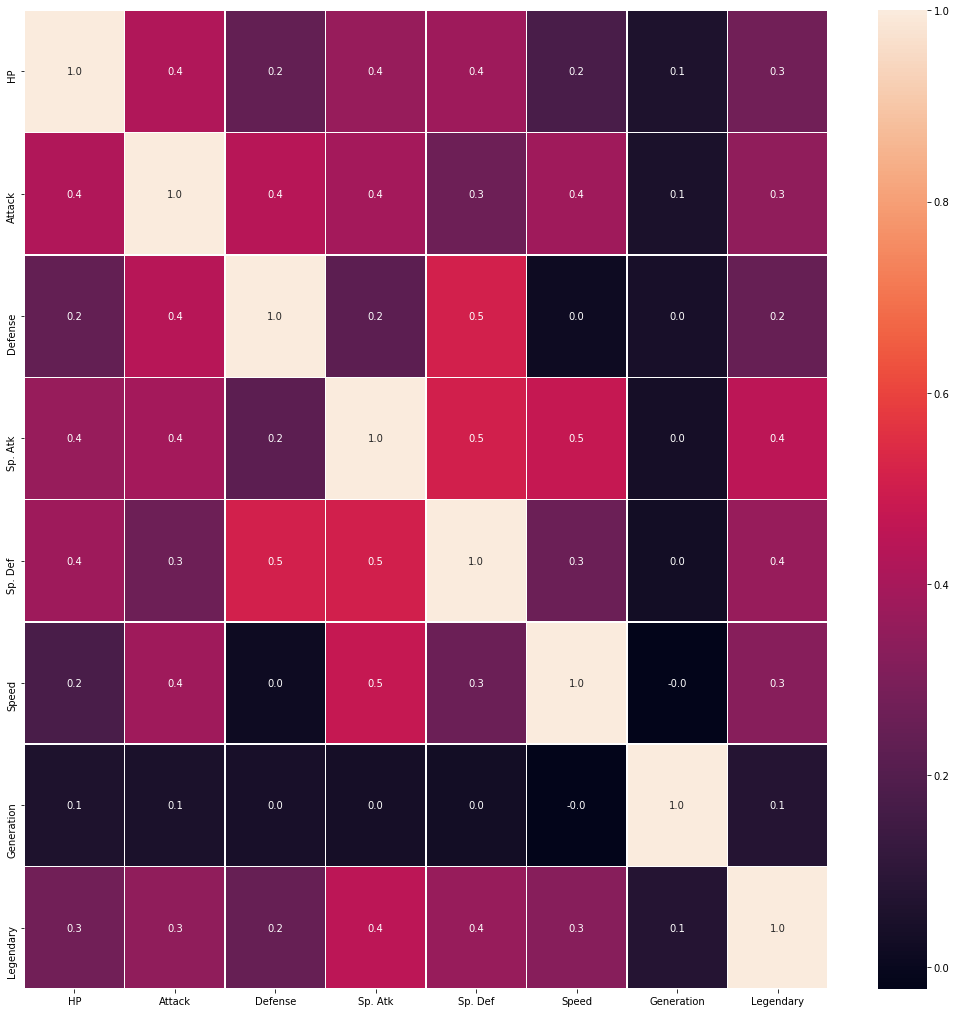

In [5]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Ranking pair of variable correlation value from lowest to highest

In [6]:
data.corr().unstack().sort_values().drop_duplicates()

Generation  Speed        -0.023121
Speed       Defense       0.015227
Generation  Sp. Def       0.028486
Sp. Atk     Generation    0.036437
Defense     Generation    0.042419
Attack      Generation    0.051451
Generation  HP            0.058683
            Legendary     0.079794
HP          Speed         0.175952
Sp. Atk     Defense       0.223549
Defense     HP            0.239622
Legendary   Defense       0.246377
Speed       Sp. Def       0.259133
Sp. Def     Attack        0.263990
HP          Legendary     0.273620
Legendary   Speed         0.326715
Attack      Legendary     0.345408
HP          Sp. Atk       0.362380
Legendary   Sp. Def       0.363937
Sp. Def     HP            0.378718
Attack      Speed         0.381240
Sp. Atk     Attack        0.396362
Attack      HP            0.422386
            Defense       0.438687
Sp. Atk     Legendary     0.448907
            Speed         0.473018
Sp. Def     Sp. Atk       0.506121
            Defense       0.510747
HP          HP      